In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-11-15 23:49:35.256060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 23:49:36.109094: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 128
dataset_take = 7500
learning_rate = 1.5e-3
batch_per_file_size = 8
node_embedding_size = 19
layers = [180, 90, 48, 52, 36]

dataset = LayoutDataset(
    batch_size, dataset_take,
    build_tfrecords=False,
    batch_per_file_size=batch_per_file_size
)

2023-11-15 23:49:38.920092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 23:49:39.029635: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 23:49:39.029882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

train layout:nlp:default 7500 False
train layout:nlp:random 7500 False
train layout:xla:random 7500 True
train layout:xla:default 7500 True
test all_filenames 10000 False
valid all_filenames 1000 False


In [3]:
mlp = LayoutMLP(
    batch_size,
    learning_rate=learning_rate,
    batch_per_file_size=batch_per_file_size,
    node_embedding_size=node_embedding_size,
    validation_frequency=10_000,
    validations_without_improvement=5,
    layer_sizes=layers,
    loss='pairwise_hinge',
    n_siblings=dataset.n_siblings,
    l1_multiplier=2e-8,
    output_name='layout_11_15_23_50'
)

In [4]:
mlp.train(dataset, None)

2023-11-15 23:52:22.639709: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-15 23:52:22.673163: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f784bb07310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-15 23:52:22.673282: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-15 23:52:22.693148: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-15 23:52:22.917461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-15 23:52:23.071549: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

iteration 500 training loss 2.8867962 lr 0.00007
iteration 1000 training loss 3.2079296 lr 0.00015
iteration 1500 training loss 3.1730704 lr 0.00022
iteration 2000 training loss 2.2146318 lr 0.00030
iteration 2500 training loss 2.0466192 lr 0.00037
iteration 3000 training loss 1.8946725 lr 0.00045
iteration 3500 training loss 2.0046773 lr 0.00052
iteration 4000 training loss 2.4057088 lr 0.00060
iteration 4500 training loss 2.2394052 lr 0.00067
iteration 5000 training loss 2.1460843 lr 0.00075
iteration 5500 training loss 2.008442 lr 0.00082
iteration 6000 training loss 1.813595 lr 0.00090
iteration 6500 training loss 1.9178298 lr 0.00097
iteration 7000 training loss 1.4428946 lr 0.00105
iteration 7500 training loss 1.9269538 lr 0.00112
iteration 8000 training loss 1.841162 lr 0.00120
iteration 8500 training loss 1.5740969 lr 0.00127
iteration 9000 training loss 1.5124357 lr 0.00135
iteration 9500 training loss 1.096131 lr 0.00142
iteration 10000 training loss 1.1524776 lr 0.00150
layo

iteration 70000 training loss 0.8027424 lr 0.00131
layout:nlp:random 0.9274529075417801
layout:nlp:default 0.48559058776537223
layout:xla:random 0.6469823047665795
layout:xla:default 0.36820434508026095
epoch 0, it 70000 validation loss -0.607
iteration 70500 training loss 1.3581235 lr 0.00130
iteration 71000 training loss 0.81078434 lr 0.00130
iteration 71500 training loss 1.3499676 lr 0.00130
iteration 72000 training loss 0.7674684 lr 0.00129
iteration 72500 training loss 0.71951026 lr 0.00129
iteration 73000 training loss 0.84608567 lr 0.00129
iteration 73500 training loss 1.0839617 lr 0.00128
iteration 74000 training loss 1.542205 lr 0.00128
iteration 74500 training loss 1.0095628 lr 0.00128
iteration 75000 training loss 1.1403459 lr 0.00128
iteration 75500 training loss 1.2103667 lr 0.00127
iteration 76000 training loss 0.8237318 lr 0.00127
iteration 76500 training loss 0.9339798 lr 0.00127
iteration 77000 training loss 1.0542405 lr 0.00126
iteration 77500 training loss 1.2980556 

iteration 136500 training loss 1.0719526 lr 0.00077
iteration 137000 training loss 0.9217926 lr 0.00077
iteration 137500 training loss 0.7745583 lr 0.00077
iteration 138000 training loss 1.0150934 lr 0.00076
iteration 138500 training loss 0.7333142 lr 0.00076
iteration 139000 training loss 1.373514 lr 0.00075
iteration 139500 training loss 1.1240718 lr 0.00075
iteration 140000 training loss 1.1635025 lr 0.00074
layout:nlp:random 0.9396952160916967
layout:nlp:default 0.5101482820936982
layout:xla:random 0.6699808489925582
layout:xla:default 0.3802578129313324
epoch 0, it 140000 validation loss -0.625
iteration 140500 training loss 1.0490718 lr 0.00074
iteration 141000 training loss 1.066953 lr 0.00073
iteration 141500 training loss 1.0931051 lr 0.00073
iteration 142000 training loss 1.1195779 lr 0.00072
iteration 142500 training loss 0.796134 lr 0.00072
iteration 143000 training loss 0.8974181 lr 0.00072
iteration 143500 training loss 1.199885 lr 0.00071
iteration 144000 training loss 1

In [5]:
mlp.best_val_subsets

{'layout:nlp:random': 0.9443282702200758,
 'layout:nlp:default': 0.5101482820936982,
 'layout:xla:random': 0.6699808489925582,
 'layout:xla:default': 0.3802578129313324}

In [6]:
np.mean(list(mlp.best_val_subsets.values()))

0.6261788035594161

## Evaluate validation set

In [7]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

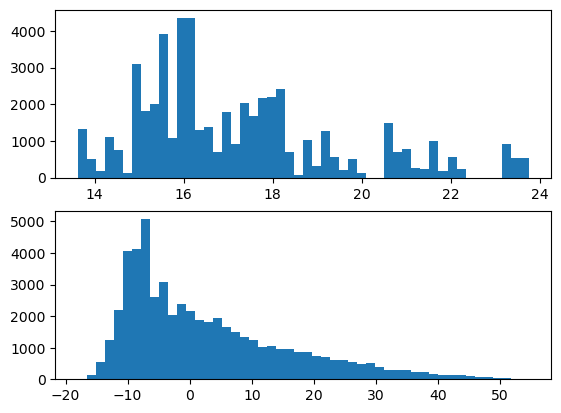

In [8]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

In [9]:
val_df.groupby('ID').apply(lambda x: x.min()).sort_values('prediction')

,ID,config_index,prediction,target
ID,,,,
b'layout:xla:random:resnet50.4x4.fp16',b'layout:xla:random:resnet50.4x4.fp16',15,-18.025673,19.288380
b'layout:xla:default:bert_pretraining.4x4.fp16',b'layout:xla:default:bert_pretraining.4x4.fp16',24,-15.992846,17.647287
b'layout:xla:random:resnet_v1_50_official_batch_128_bf16',b'layout:xla:random:resnet_v1_50_official_batc...,19,-15.461615,20.910173
b'layout:xla:random:bert_pretraining.4x4.fp16',b'layout:xla:random:bert_pretraining.4x4.fp16',9,-15.363542,17.647587
b'layout:xla:random:tf2_bert_pretrain_dynamic_batch_size',b'layout:xla:random:tf2_bert_pretrain_dynamic_...,14,-14.643965,17.944567
b'layout:xla:default:resnet50.4x4.fp16',b'layout:xla:default:resnet50.4x4.fp16',4,-13.772734,19.288345
b'layout:nlp:random:small_bert_bert_en_uncased_L-12_H-768_A-12_batch_size_64_train',b'layout:nlp:random:small_bert_bert_en_uncased...,7,-13.405814,18.142097
b'layout:xla:default:tf2_bert_pretrain_dynamic_batch_size',b'layout:xla:default:tf2_bert_pretrain_dynamic...,25,-13.007638,17.943745
b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-768_A-12_batch_size_16_train',b'layout:nlp:random:small_bert_bert_en_uncased...,24,-12.743563,17.055071


Text(0.5, 1.0, "b'layout:xla:random:mlperf_bert_batch_24_2x2'")

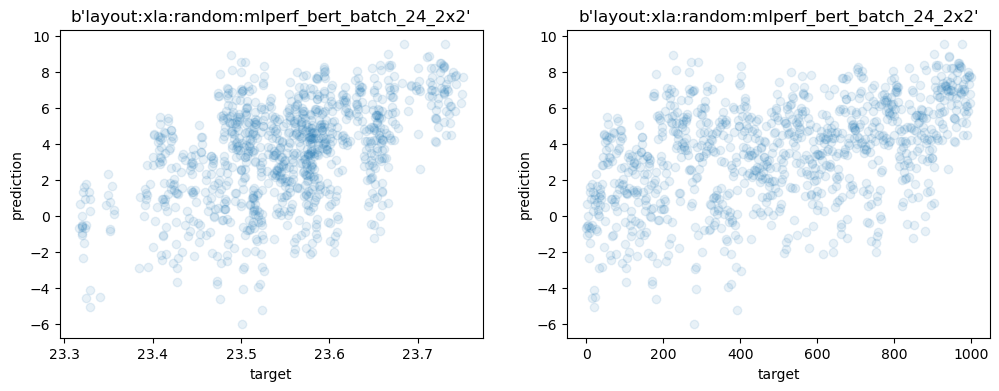

In [10]:
x_lin = np.linspace(15, 25, 100)
#plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(1_000)
graph_id = np.random.choice(val_df['ID'].unique())
#graph_id = b'layout:xla:default:inception_v3_batch_128_train'
#graph_id = b'layout:xla:default:unet_3d.4x4.bf16'
random_sample = val_df[val_df['ID'] == graph_id].copy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

random_sample.sort_values('target', inplace=True)
plt.subplot(1, 2, 2)
plt.scatter(
    np.arange(len(random_sample)),
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

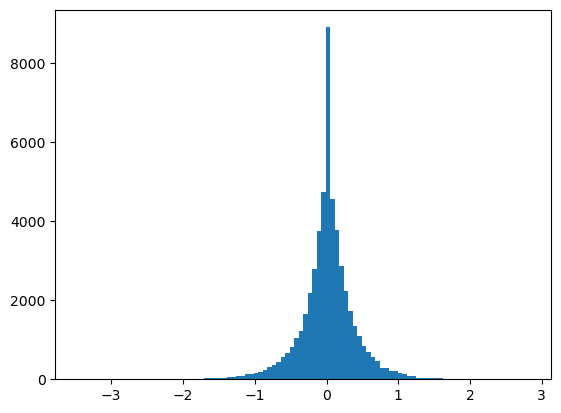

In [11]:
plt.hist(mlp.dense_layer_node_1.kernel.numpy().flatten(), bins=100);

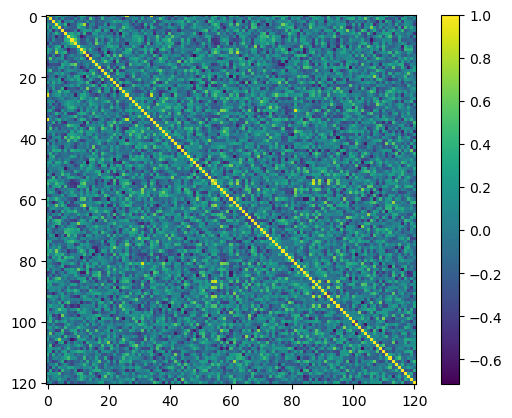

In [12]:
emb = mlp.embedding_layer_node_ops.weights[0].numpy()
emb = emb / np.expand_dims(np.linalg.norm(emb, axis=1), axis=-1)
dots = np.matmul(emb, emb.T)
plt.imshow(dots)
plt.colorbar()

In [13]:
ind = np.unravel_index(np.argsort(dots.flatten())[-127], dots.shape)
ind

(31, 81)

In [ ]:
val_df[val_df['ID'] == b'layout:xla:default:unet_3d.4x4.bf16'].sort_values('target')

In [ ]:
for val_batch in dataset.valid_data:
    if b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy():
        print(val_batch['layout_id'])
        break

In [ ]:
np.unique(val_batch['layout_id'].numpy())

In [ ]:
b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy()

In [ ]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
#plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [14]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

In [15]:
val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
layout:nlp:default:albert_en_xlarge_batch_size_16_test                               37640;37660;9514;32912;32968;18915;13483;25326...
layout:nlp:default:bert_en_cased_L-12_H-768_A-12_batch_size_16_test                  66343;66408;26382;94535;78297;86211;77065;7088...
layout:nlp:default:bert_multi_cased_L-12_H-768_A-12_batch_size_16_train              1045;28098;12852;22250;2437;8073;26670;22355;2...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test      13764;39463;58339;67613;199;2526;2517;35665;72...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_64_train     11233;8684;1804;1773;18658;6063;5760;5571;1805...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_32_test      18881;31482;71482;74797;36691;32363;50156;5752...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_64_train     22257;7773;6620;7749;36368;1837;23044;6578;122...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H

In [16]:
val_df

,ID,config_index,prediction,target
0,b'layout:nlp:default:bert_en_cased_L-12_H-768_...,68595,-7.446213,15.545280
1,b'layout:nlp:random:albert_en_xlarge_batch_siz...,53585,6.689772,17.922859
2,b'layout:nlp:random:small_bert_bert_en_uncased...,88489,13.635883,16.119314
3,b'layout:nlp:default:bert_multi_cased_L-12_H-7...,13013,-11.713066,17.404507
4,b'layout:nlp:default:talking-heads_large_batch...,7281,-4.158577,18.689821
...,...,...,...,...
53476,b'layout:nlp:default:small_bert_bert_en_uncase...,31895,-9.593082,15.301944
53477,b'layout:nlp:random:bert_multi_cased_L-12_H-76...,8141,-3.530244,17.453238
53478,b'layout:nlp:default:small_bert_bert_en_uncase...,18622,-8.576431,16.078899
53479,b'layout:xla:random:mlperf_bert_batch_24_2x2',4285,5.890018,23.721092


In [17]:
val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3])).unique()

array(['layout:nlp:default', 'layout:nlp:random', 'layout:xla:random',
       'layout:xla:default'], dtype=object)

In [18]:
def compute_layout_score_group(df):
    score, _ = kendalltau(df['prediction'], df['target'])
    return score

val_df['subset'] = val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
all_means = []
for subset in val_df['subset'].unique():
    mean = np.mean(val_df[val_df['subset'] == subset].groupby('ID').apply(compute_layout_score_group))
    all_means.append(mean)
    print(subset, mean)
print(np.mean(all_means))

layout:nlp:default 0.5010562830050881
layout:nlp:random 0.9436840899177078
layout:xla:random 0.6524642297401461
layout:xla:default 0.37096503958920996
0.617042410563038


In [ ]:
np.mean([
    0.9235,
    0.6591,
    0.516,
    0.358,
    0.968
])

In [19]:
val_scores = val_df.groupby('ID').apply(compute_layout_score_group)
val_scores.sort_values()

ID
b'layout:xla:default:unet_3d.4x4.bf16'                                                  0.026677
b'layout:xla:random:unet_3d.4x4.bf16'                                                   0.194741
b'layout:xla:default:mlperf_bert_batch_24_2x2'                                          0.226418
b'layout:xla:default:resnet_v1_50_official_batch_128_bf16'                              0.235929
b'layout:xla:random:mlperf_bert_batch_24_2x2'                                           0.322142
b'layout:xla:default:tf2_bert_pretrain_dynamic_batch_size'                              0.374754
b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_64_train'      0.398919
b'layout:nlp:default:small_bert_bert_en_uncased_L-4_H-512_A-8_batch_size_32_train'      0.403839
b'layout:nlp:default:small_bert_bert_en_uncased_L-4_H-256_A-4_batch_size_32_train'      0.431699
b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train'      0.438643
b'layout:nlp:default:small_

In [ ]:
valid_nodes_list = []
for batch in dataset.valid_data:
    df = pd.DataFrame(
        np.stack([
            batch['layout_id'].numpy(), 
            batch['valid_nodes'].numpy()], axis=-1),
        columns=['ID', 'valid_nodes']
    ).drop_duplicates('ID')
    valid_nodes_list.append(df)
valid_nodes = pd.concat(valid_nodes_list).drop_duplicates('ID')
valid_nodes

In [ ]:
valid_nodes.set_index('ID', inplace=True)
valid_nodes['scores'] = val_scores
valid_nodes

In [ ]:
valid_nodes.reset_index(inplace=True)
valid_nodes

In [ ]:
valid_nodes['subset'] = valid_nodes['ID'].apply(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
valid_nodes

In [ ]:
plt.scatter(
    valid_nodes['scores'],
    valid_nodes['valid_nodes']
)

In [ ]:
subset = 'layout:xla:random'
valid_nodes_subset = valid_nodes[valid_nodes['subset'] == subset]
print(valid_nodes_subset.sort_values('valid_nodes').iloc[-1])
plt.scatter(
    valid_nodes_subset['scores'],
    valid_nodes_subset['valid_nodes']
)

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [20]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'layout:nlp:default:d15316c12eefdef1ba549eb43...,0,-6.099756
1,b'layout:nlp:random:32531d07a084b319dce484f53a...,0,36.276894
2,b'layout:xla:default:937ee0eb0d5d6151b7b825293...,0,6.273229
3,b'layout:nlp:random:58cc2e418c3a8a19b871e15964...,0,8.586536
4,b'layout:nlp:default:171b0513d8874a427ccfa46d1...,0,-9.270791
...,...,...,...
49997,b'layout:nlp:default:58cc2e418c3a8a19b871e1596...,999,-6.753909
49998,b'layout:xla:random:5335ed13823b0a518ee3c79ba4...,999,0.987462
49999,b'layout:nlp:default:492c7a94d559aa4a88769142d...,999,-4.852041
50000,b'layout:nlp:default:3a0c5517a87df8d82fd637b83...,1000,-4.534871


In [21]:
test_df.groupby('ID').count()

,config_index,prediction
ID,,
b'layout:nlp:default:016ac66a44a906a695afd2228509046a',1000,1000
b'layout:nlp:default:171b0513d8874a427ccfa46d136fbadc',1000,1000
b'layout:nlp:default:23559853d9702baaaacbb0c83fd32266',1000,1000
b'layout:nlp:default:29886a50d55cfe77a9497bc906c76ce9',1000,1000
b'layout:nlp:default:32531d07a084b319dce484f53a4cf3fc',1000,1000
b'layout:nlp:default:38524e2ff135ded55b5286407e7af6b7',1000,1000
b'layout:nlp:default:3a0c5517a87df8d82fd637b83298a3ba',1001,1001
b'layout:nlp:default:492c7a94d559aa4a88769142d2a68362',1000,1000
b'layout:nlp:default:58cc2e418c3a8a19b871e15964b534ad',1000,1000


In [22]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
layout:nlp:default:016ac66a44a906a695afd2228509046a    485;192;156;31;587;771;380;578;174;923;224;845...
layout:nlp:default:171b0513d8874a427ccfa46d136fbadc    975;404;648;452;559;583;290;361;307;273;417;99...
layout:nlp:default:23559853d9702baaaacbb0c83fd32266    993;842;330;396;417;715;403;112;728;449;305;75...
layout:nlp:default:29886a50d55cfe77a9497bc906c76ce9    659;375;510;325;820;156;152;697;566;39;688;765...
layout:nlp:default:32531d07a084b319dce484f53a4cf3fc    362;666;472;226;643;451;904;755;164;552;638;69...
layout:nlp:default:38524e2ff135ded55b5286407e7af6b7    747;265;832;853;728;543;335;749;300;909;328;71...
layout:nlp:default:3a0c5517a87df8d82fd637b83298a3ba    905;98;494;423;362;679;389;229;427;465;565;152...
layout:nlp:default:492c7a94d559aa4a88769142d2a68362    170;843;514;25;931;304;827;549;225;11;384;836;...
layout:nlp:default:58cc2e418c3a8a19b871e15964b534ad    244;388;699;882;808;764;118;138;743;641;538;93...
layout:nlp:default:60880ed76de53f4d7a1b960b24f20f7d 

In [23]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('predictions/layout_final_test_prediction_11_15_23_50.csv')